# 비율 데이터의 시각화

각 부분의 비율을 그래프 상의 면적으로 나타낼 수 있다. 

In [1]:
import matplotlib.pyplot as plt

## pie 차트

pie 차트는 각 범주가 데이터에서 차지하는 비율을 나타내는 데 자주 사용된다.


In [2]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]

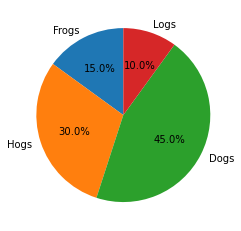

In [3]:
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.show()

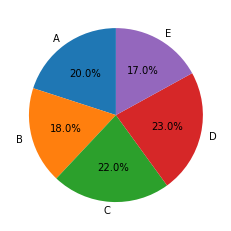

In [4]:
company = ['A','B','C','D','E']
market_share = [20,18,22,23,17]

plt.pie(market_share, labels=company, autopct='%1.1f%%', startangle=90)
plt.show()

파이 차트는 가독성이 떨어진다. 비율이 엇비슷한 경우 그 차이를 정확하게 표현 할 수 없다. 라벨을 추가하면 도움이 된다.  


## 막대 그래프로 비율을 표시
비율을 시각화하기 위해서 누적 막대 그래프 또는 막대 그래프를 쓰는 것이 더 효과적인 경우가 많다. 

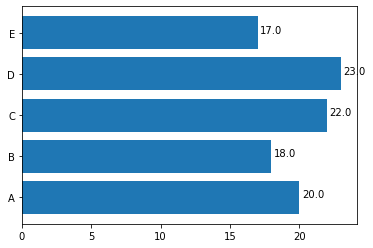

In [5]:
ax = plt.barh(company, market_share)
for p in ax.patches:
    x,y,h,w = p.get_bbox().bounds
    plt.annotate("%.1f"%h, (h+1,y+w/2), ha='center' )
plt.show()

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
year = ['2015']*5 + ['2016']*5 + ['2017']*5
company = ['A','B','C','D','E']*3
share = [20,18,22,23,17]+[18,22,23,17,20]+[22,23,17,20,18]

df = pd.DataFrame({'year':year, 'company':company, 'share':share})
df

,year,company,share
0,2015,A,20
1,2015,B,18
2,2015,C,22
3,2015,D,23
4,2015,E,17
5,2016,A,18
6,2016,B,22
7,2016,C,23
8,2016,D,17
9,2016,E,20


<AxesSubplot:xlabel='year', ylabel='share'>

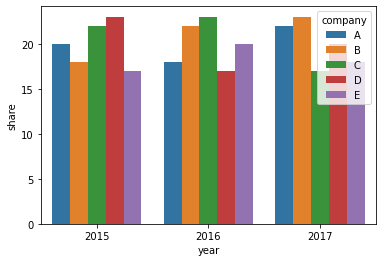

In [8]:
# seaborn으로 막대그래프 표시
sns.barplot(x='year',y='share', hue='company', data=df)

In [9]:
df1 = df.groupby(['year','company']).sum().unstack().fillna(0)
df1

share                
company     A   B   C   D   E
year                         
2015       20  18  22  23  17
2016       18  22  23  17  20
2017       22  23  17  20  18

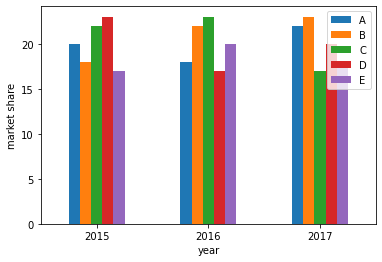

In [10]:
# 판다스 막대 그래프
df1.plot(kind='bar',rot=0)
plt.ylabel('market share')
plt.legend(df1.columns.levels[1])
plt.show()

### 누적 막대 그래프

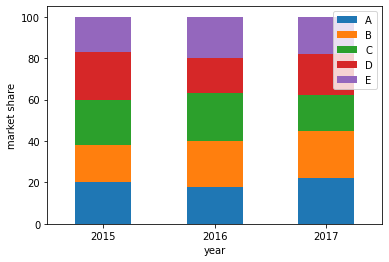

In [11]:
# 판다스 누적 막대 그래프
df1.plot(kind='bar',rot=0, stacked=True)
plt.ylabel('market share')
plt.legend(df1.columns.levels[1])
plt.show()

In [12]:
# matplotlib로 누적 막대 그래프 표시하기
A = df[df.company=='A'].share.values
B = df[df.company=='B'].share.values
C = df[df.company=='C'].share.values
D = df[df.company=='D'].share.values
E = df[df.company=='E'].share.values

In [13]:
c_bottom = A + B
d_bottom = c_bottom + C
e_bottom = d_bottom + D

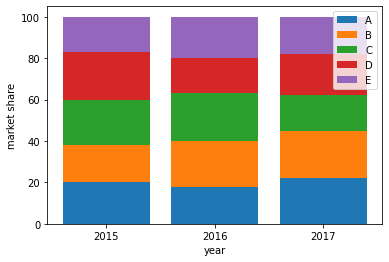

In [14]:
x = df1.index
plt.bar(x, A, label= 'A')
plt.bar(x, B, bottom=A, label= 'B')
plt.bar(x, C, bottom=c_bottom, label= 'C')
plt.bar(x, D, bottom=d_bottom,label= 'D')
plt.bar(x, E, bottom=e_bottom, label= 'E')

plt.xlabel('year')
plt.ylabel('market share')
plt.legend()

같은 년도 안에서 상대적인 시장 점유율을 비교하기 어렵다. 연도별 시장 점유율의 변동 추이를 파악하기 어렵다.
 

파이, 누적, 병렬 막대 3가지 중 어느 것이 절대적으로 좋다고 말할 수 없다. 상황과 주제에 맞추어 사용하면 된다. 

# 비율 시각화 실습 - 막대, 파이

1. 타이타닉 데이터 셋을 읽어들인다.
```
titanic = pd.read_csv('./data/titanic.csv')
titanic.info()
```
2. 남여 성별 생존율을 막대 그래프로 시각화 하시오.
3. 남여 성별 생존율을 파이 차트로 시각화 하시오.